# Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

# FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import warnings
warnings.filterwarnings('ignore')

Import Train Dataset:

In [5]:
df_train = pd.read_excel("Data_Train.xlsx")
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


The above dataset is a train dataset,it contains numerical and categorical type of columns.

# EDA:

In [6]:
df_train.shape

(10683, 11)

In [7]:
df_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

The Date and Time columns are identified as object datatype,so let's change those columns to 'datetime'  type. 

In [8]:
df_train['Date_of_Journey']=pd.to_datetime(df_train['Date_of_Journey'])
df_train['Dep_Time']=pd.to_datetime(df_train['Dep_Time'])
df_train['Arrival_Time']=pd.to_datetime(df_train['Arrival_Time'])

In [94]:
duration_hrs =[]
duration_mins =[]
dur = list(df_train["Duration"])
for i in range(len(dur)):
    if len(dur[i].split()) != 2:
        if "h" in dur[i]:
            dur[i] = dur[i].strip()+ " 0m"
        else:
            dur[i] = "0h " + dur[i]

for i in range(len(dur)):
    duration_hrs.append(int(dur[i].split(sep="h")[0]))
    duration_mins.append(int(dur[i].split(sep="m")[0].split()[-1]))  

In [96]:
df_train["Duration_hours"] = duration_hrs
df_train["Duration_minutes"] = duration_mins
df_train.drop("Duration",axis=1,inplace=True)

In [9]:
df_train.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

Let's seperate the Date of Journey column into Day and Month.

In [10]:
df_train["Day_of_Journey"] = pd.to_datetime(df_train.Date_of_Journey, format="%d/%m/%Y").dt.day
df_train["Month_of_Journey"] = pd.to_datetime(df_train.Date_of_Journey, format="%d/%m/%Y").dt.month
df_train.drop("Date_of_Journey",axis=1,inplace=True)

In [97]:
df_train

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No Info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No Info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No Info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No Info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No Info,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No Info,4107,4,9,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No Info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No Info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,Delhi,BLR → DEL,non-stop,No Info,12648,3,1,11,30,14,10,2,40


In [14]:
df_train["Dep_Hour"] = pd.to_datetime(df_train["Dep_Time"]).dt.hour
df_train["Dep_Min"] = pd.to_datetime(df_train["Dep_Time"]).dt.minute

In [15]:
df_train.drop("Dep_Time",axis=1,inplace=True)

In [18]:
#Checking valuecounts
for i in df_train.columns:
        print(df_train[i].value_counts())
        print('_________')

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
_________
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
_________
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
_________
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → 

Replacing the duplicate values.

In [19]:
df_train["Destination"]=df_train["Destination"].replace("New Delhi","Delhi")
df_train["Additional_Info"]=df_train["Additional_Info"].replace("No info","No Info")

In [35]:
df_train["Airline"] = df_train["Airline"].replace("Jet Airways Business","Jet Airways")
df_train["Airline"] = df_train["Airline"].replace("Multiple carriers Premium economy","Multiple carriers")
df_train["Destination"] = df_train["Destination"].replace("New Delhi","Delhi")

In [37]:
df_train["Airline"] = df_train["Airline"].replace("Vistara Premium economy","Vistara")

Checking for Empty spaces in Target.

In [25]:
df_train.loc[df_train['Price']==" "]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min


In [20]:
df_train.isnull().sum()

Airline             0
Source              0
Destination         0
Route               1
Duration            0
Total_Stops         1
Additional_Info     0
Price               0
Day_of_Journey      0
Month_of_Journey    0
Dep_Hour            0
Dep_Min             0
Arrival_Hour        0
Arrival_Min         0
dtype: int64

We found null values in Route and total stops.

In [22]:
from sklearn.impute import SimpleImputer
emb=SimpleImputer(strategy="most_frequent")
df_train['Route']=emb.fit_transform(df_train['Route'].values.reshape(-1, 1))
df_train['Total_Stops']=emb.fit_transform(df_train['Total_Stops'].values.reshape(-1, 1))

<AxesSubplot:>

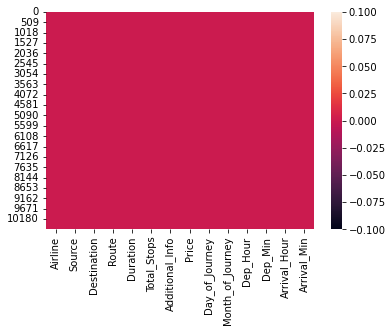

In [23]:
sns.heatmap(df_train.isnull())

Now,all null values are cleared.

In [26]:
df_train.describe()

,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,9087.064121,12.682205,5.534775,12.490686,24.411214,13.348778,24.690630
std,4611.359167,8.803701,2.987489,5.748650,18.767980,6.859125,16.506036
min,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000
75%,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000
max,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000


-->The count of every column is identified as 10683.

-->We can clearly see that there is huge difference between Max and 75%,so there is a scope for outliers.

-->There is a huge statistical difference between price and other columns.

-->By Observing Mean and median data,it is clear that our data is skewed.

-->Let's resolve all the outliers and skewed data in further process.

In [27]:
df_train.nunique()

Airline               12
Source                 5
Destination            5
Route                128
Duration             368
Total_Stops            5
Additional_Info        9
Price               1870
Day_of_Journey         9
Month_of_Journey       7
Dep_Hour              24
Dep_Min               12
Arrival_Hour          24
Arrival_Min           12
dtype: int64

# Data Visualisation:

Univariate Analysis:

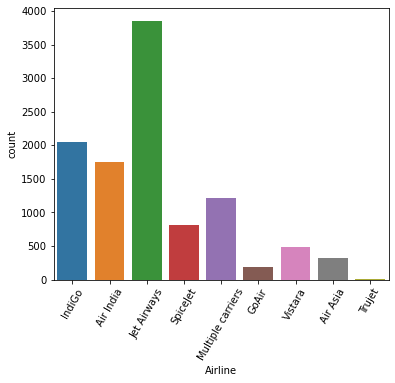

In [38]:
plt.figure(figsize=(6,5))
sns.countplot(df_train["Airline"])
plt.xticks(rotation=60)
plt.show()

Jet Airways serves many destinations with high count of flights and Truejet is least among all other Airlines.

<AxesSubplot:xlabel='Source', ylabel='count'>

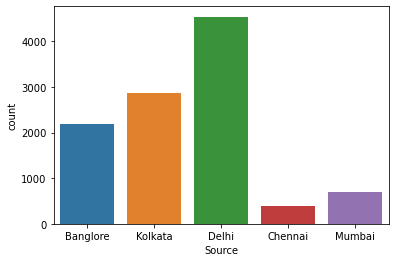

In [39]:
sns.countplot(df_train['Source'])

Delhi is the main Source where many flights Take off,and chennai is in least place.

<AxesSubplot:xlabel='Destination', ylabel='count'>

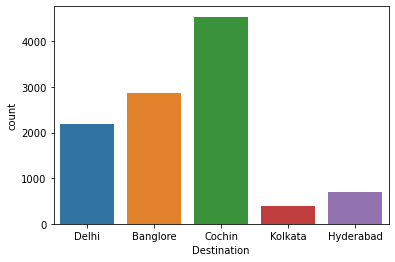

In [40]:
sns.countplot(df_train['Destination'])

Most of the flights serves to Cochin and Banglore. 

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

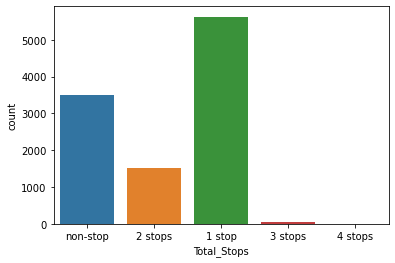

In [42]:
sns.countplot(df_train['Total_Stops'])

Many flights has 1 Stop between source and destination.Next Non-Stop flights has high count.

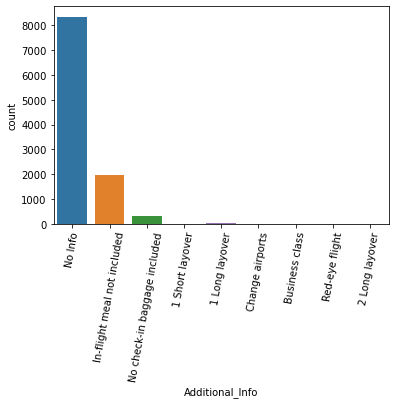

In [45]:
sns.countplot(df_train["Additional_Info"])
plt.xticks(rotation=80)
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Density'>

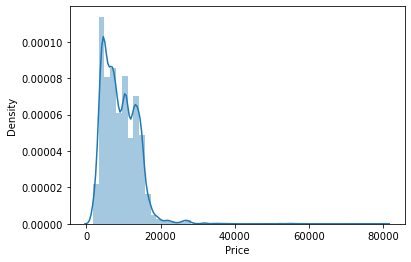

In [53]:
sns.distplot(df_train['Price'])

The data is almost normally distributed.

<AxesSubplot:xlabel='Price', ylabel='Density'>

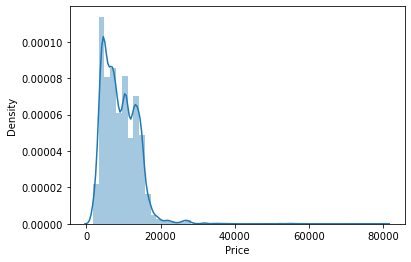

In [62]:
sns.distplot(df_train['Price'])

<AxesSubplot:xlabel='Dep_Hour', ylabel='Density'>

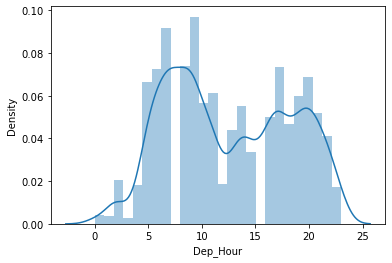

In [63]:
sns.distplot(df_train['Dep_Hour'])

<AxesSubplot:xlabel='Dep_Min', ylabel='Density'>

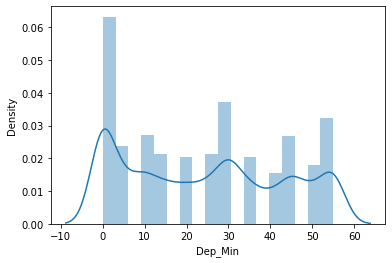

In [64]:
sns.distplot(df_train['Dep_Min'])

<AxesSubplot:xlabel='Arrival_Hour', ylabel='Density'>

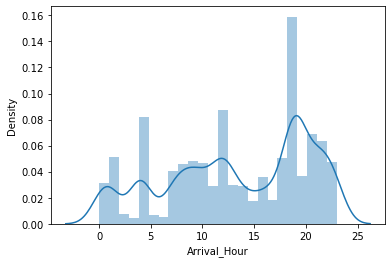

In [65]:
sns.distplot(df_train['Arrival_Hour'])

<AxesSubplot:xlabel='Arrival_Min', ylabel='Density'>

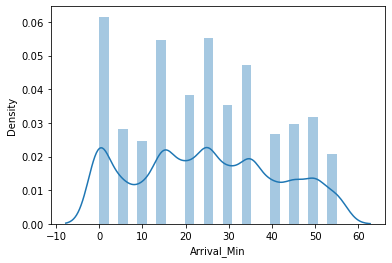

In [66]:
sns.distplot(df_train['Arrival_Min'])

Almost every column is having skewness

Bivariate Analysis:

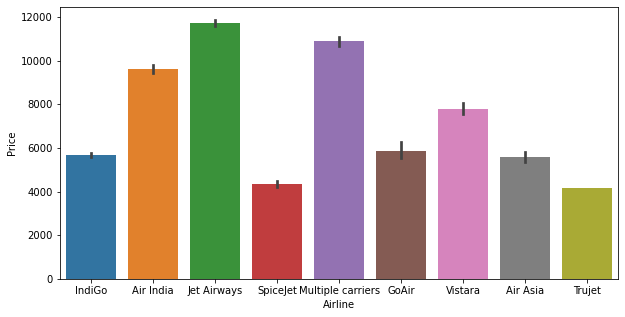

In [74]:
plt.figure(figsize=(10,5))
sns.barplot(df_train["Airline"],df_train["Price"],data=df_train)
plt.show()

The pricing of Jet Airways and Multiple Carriers Airine is Higher than otehr Airlines.Spicejet serves in very low price compared to others.

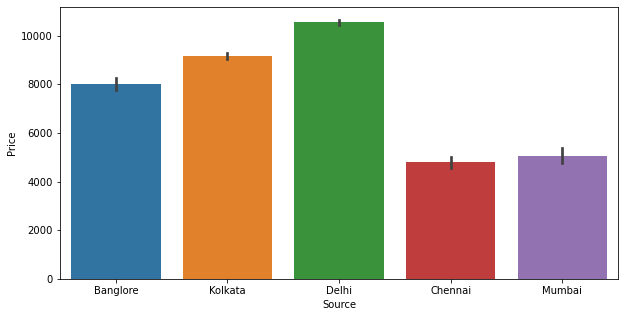

In [76]:
plt.figure(figsize=(10,5))
sns.barplot(df_train["Source"],df_train["Price"],data=df_train)
plt.show()

The Prices are at higher side in Delhi followed by kolkata and Banglore.

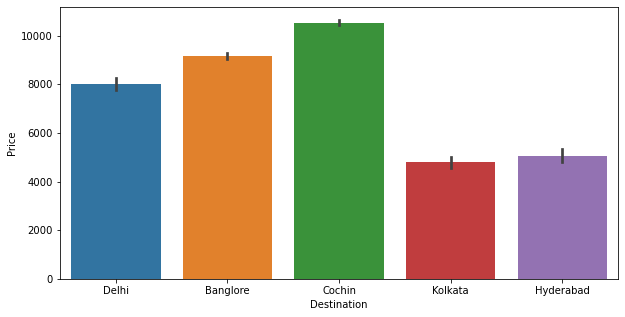

In [78]:
plt.figure(figsize=(10,5))
sns.barplot(df_train["Destination"],df_train["Price"],data=df_train)
plt.show()

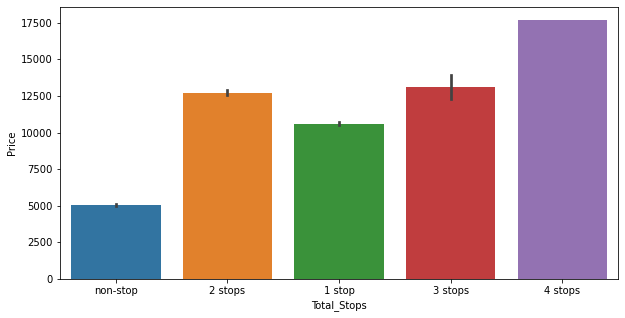

In [81]:
plt.figure(figsize=(10,5))
sns.barplot(df_train["Total_Stops"],df_train["Price"],data=df_train)
plt.show()

From Above we can see that the price increases with increase in stops.

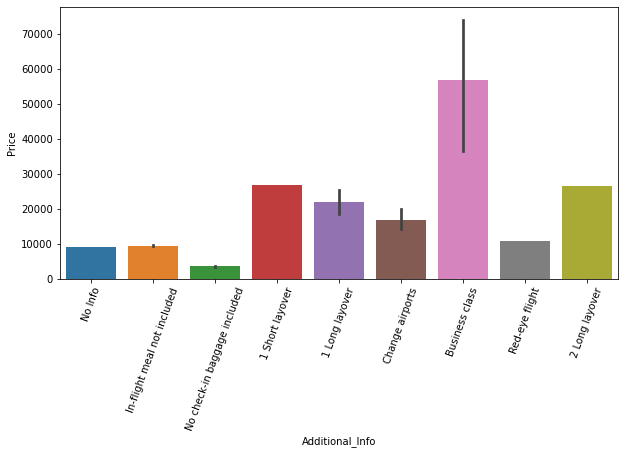

In [84]:
plt.figure(figsize=(10,5))
sns.barplot(df_train["Additional_Info"],df_train["Price"],data=df_train)
plt.xticks(rotation=70)
plt.show()

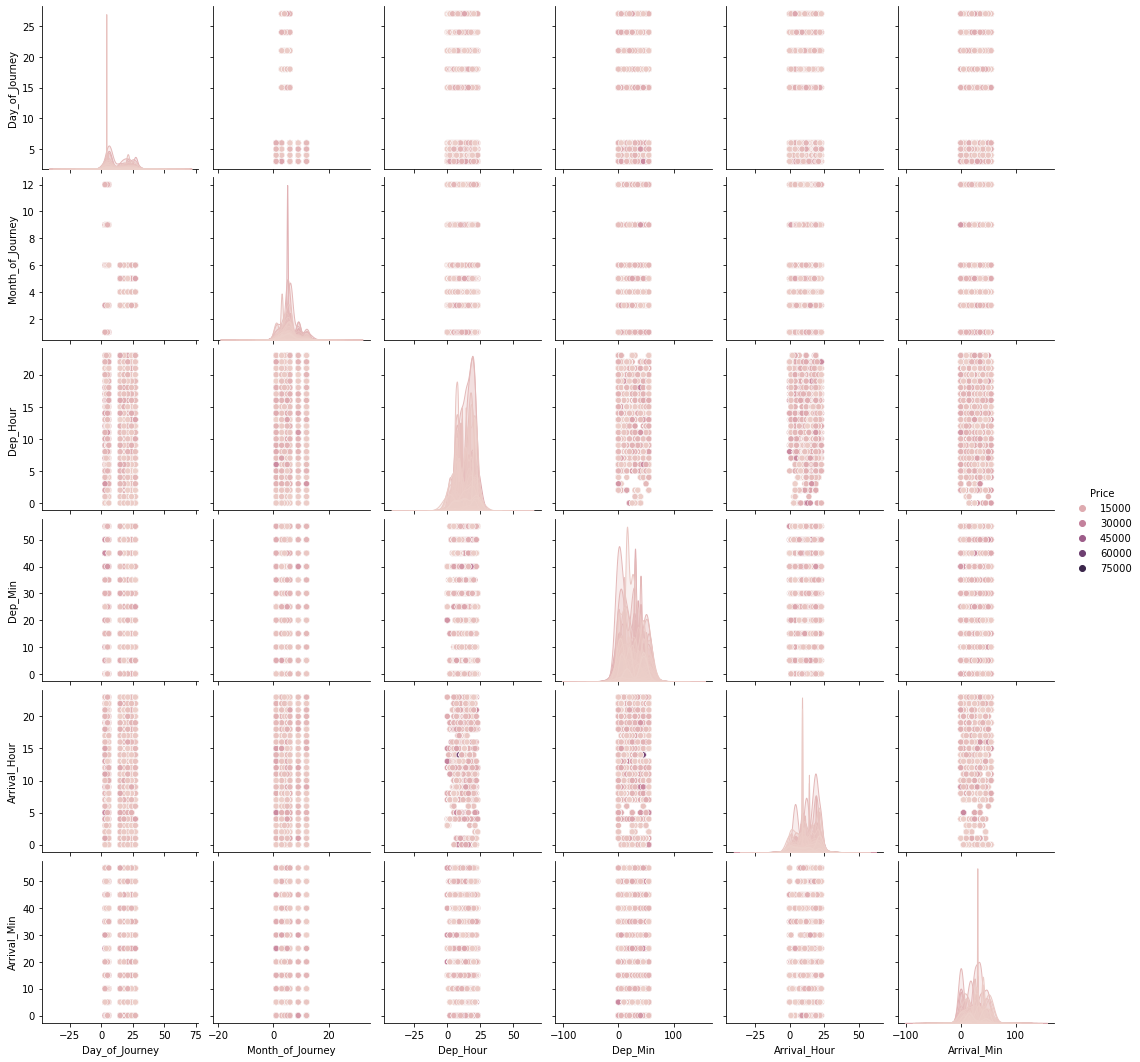

In [85]:
sns.pairplot(df_train,hue='Price')

# Outliers:

<AxesSubplot:>

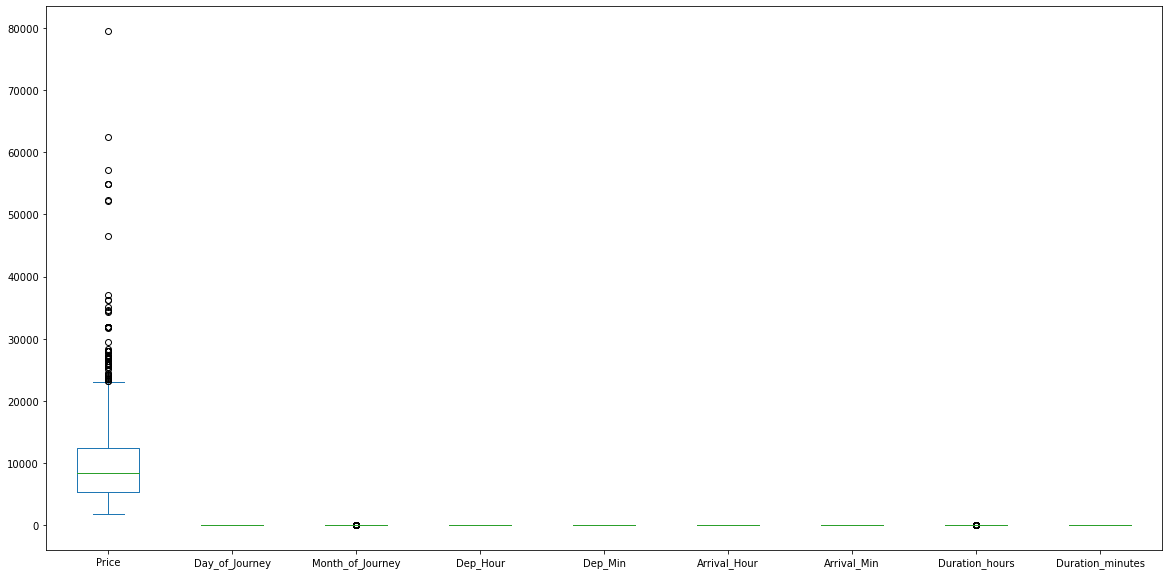

In [98]:
df_train.plot(kind='box',fontsize=10,figsize=(20,10))

Price,Month of Journey and Duration Hours has outliers.

# Removing Outliers:

Considering outliers except our Target Column.

In [100]:
col=df_train[['Month_of_Journey','Duration_hours']]

In [102]:
from scipy.stats import zscore
z=np.abs(zscore(col))
df_new=df_train[(z<3).all(axis=1)]
df_new

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No Info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No Info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No Info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No Info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No Info,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No Info,4107,4,9,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No Info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No Info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,Delhi,BLR → DEL,non-stop,No Info,12648,3,1,11,30,14,10,2,40


In [103]:
df_train.shape

(10683, 15)

In [104]:
df_new.shape

(10617, 15)

# percentage of loss:

In [105]:
Loss = (10683-10617)/1068*100
Loss

6.179775280898876

All Outliers are removed using Z-Score Technique with low perecntage of loss i.e 6%

# Skewness:

In [106]:
df_new.skew()

Price               1.824502
Day_of_Journey      0.367029
Month_of_Journey    0.628224
Dep_Hour            0.103798
Dep_Min             0.164551
Arrival_Hour       -0.361250
Arrival_Min         0.107805
Duration_hours      0.761022
Duration_minutes   -0.097354
dtype: float64

Except our Target column,Month of Journey and Duration Hours has skewness.

In [112]:
df_train["Month_of_Journey"] = np.log1p(df_train["Month_of_Journey"])
df_train["Duration_hours"] = np.log1p(df_train["Duration_hours"])

# Encoding:

In [116]:
cat_cols=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]=='object':
        cat_cols.append(i)
print(cat_cols)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [117]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df_new[cat_cols]=df_new[cat_cols].apply(enc.fit_transform)

In [118]:
df_new.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_minutes
0,3,0,2,18,4,6,3897,24,3,22,20,1,10,2,50
1,1,3,0,84,1,6,7662,5,1,5,50,13,15,7,25
2,4,2,1,118,1,6,13882,6,9,9,25,4,25,19,0
3,3,3,0,91,0,6,6218,5,12,18,5,23,30,5,25
4,3,0,2,29,0,6,13302,3,1,16,50,21,35,4,45


# Correlation:

In [119]:
df_new.corr()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_minutes
Airline,1.000000,-0.013641,0.055391,0.021921,-0.010497,0.001243,0.024773,0.025366,0.000981,-0.028238,-0.070340,-0.005868,-0.087465,-0.107800,-0.043858
Source,-0.013641,1.000000,-0.434677,0.404009,-0.225922,0.008129,0.016718,0.007158,0.062092,0.059469,-0.055929,0.026144,0.021640,0.172453,-0.145872
Destination,0.055391,-0.434677,1.000000,-0.230755,0.510659,0.093871,-0.263334,0.007309,-0.069343,-0.088810,0.097052,-0.058190,0.006954,-0.391829,0.021895
Route,0.021921,0.404009,-0.230755,1.000000,-0.439372,0.029469,0.163635,0.096042,0.042569,-0.070005,-0.066420,0.011514,-0.174071,0.292219,-0.229643
Total_Stops,-0.010497,-0.225922,0.510659,-0.439372,1.000000,0.242302,-0.572413,0.043711,-0.056923,0.038512,0.049105,-0.095213,0.176915,-0.624586,0.182696
Additional_Info,0.001243,0.008129,0.093871,0.029469,0.242302,1.000000,-0.193478,0.018760,-0.000472,-0.042549,0.001786,-0.020098,0.030347,-0.228545,0.055887
Price,0.024773,0.016718,-0.263334,0.163635,-0.572413,-0.193478,1.000000,-0.163765,0.012564,0.011430,-0.025585,0.021107,-0.088909,0.512935,-0.122893
Day_of_Journey,0.025366,0.007158,0.007309,0.096042,0.043711,0.018760,-0.163765,1.000000,-0.264540,-0.002628,-0.017421,-0.001501,-0.021901,-0.037736,-0.008671
Month_of_Journey,0.000981,0.062092,-0.069343,0.042569,-0.056923,-0.000472,0.012564,-0.264540,1.000000,0.027172,0.003923,-0.003502,-0.024076,0.062038,-0.019238
Dep_Hour,-0.028238,0.059469,-0.088810,-0.070005,0.038512,-0.042549,0.011430,-0.002628,0.027172,1.000000,-0.026077,0.010967,0.068350,0.027062,-0.029934


<AxesSubplot:>

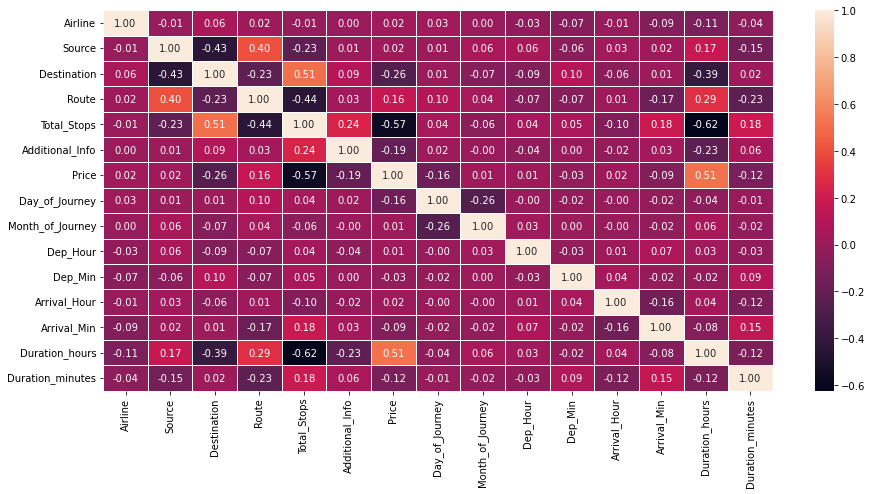

In [120]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df_new.corr(),annot=True,linewidth=0.5,fmt='.2f')

'Duration Hours' column is highly correlated and  'Total Stops' is least correlated with out target column.

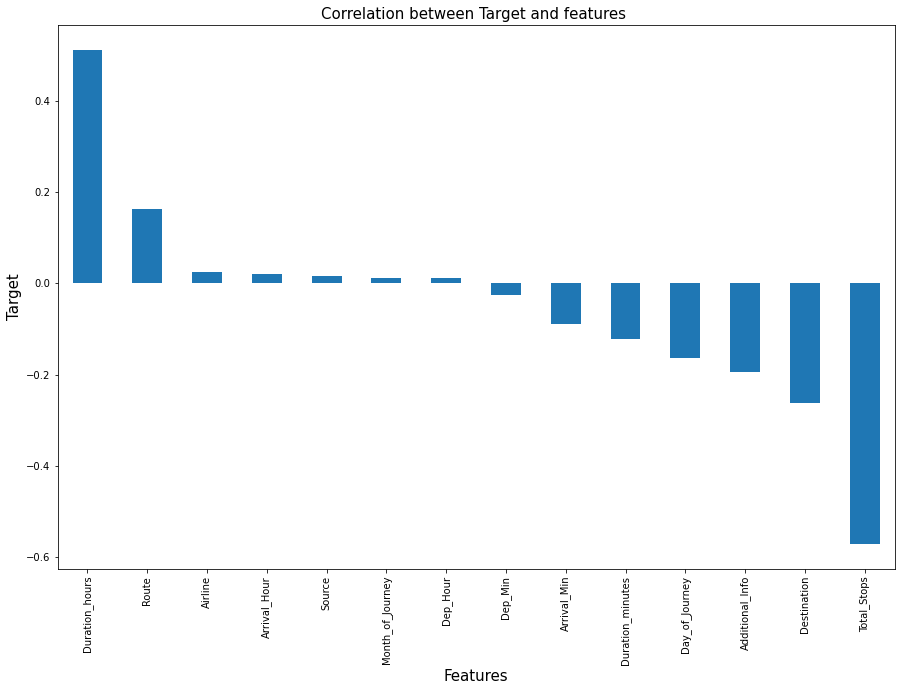

In [121]:
plt.figure(figsize=(15,10))
df_new.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.xticks(rotation=90)
plt.title('Correlation between Target and features ',fontsize=15)
plt.show()

# Seperating the columns into features and target as x and y:

In [122]:
x = df_new.drop("Price", axis=1)
y = df_new["Price"]

# Scaling:

In [126]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x=pd.DataFrame(Scaler.fit_transform(x),columns=x.columns)
x

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_minutes
0,-0.345488,-1.655042,0.812707,-1.544003,1.402360,0.331561,1.286176,-0.849241,1.649475,-0.235894,-1.794784,-0.889208,-0.980763,1.274299
1,-1.464134,0.888124,-1.157048,0.254498,-0.253797,0.331561,-0.873920,-1.518337,-1.312186,1.362715,-0.046050,-0.586465,-0.373357,-0.201145
2,0.213836,0.040402,-0.172170,1.180998,-0.253797,0.331561,-0.760231,1.158045,-0.615325,0.030541,-1.357601,0.019019,1.084417,-1.676590
3,-0.345488,0.888124,-1.157048,0.445248,-0.805850,0.331561,-0.873920,2.161688,0.952614,-1.035199,1.411228,0.321762,-0.616319,-0.201145
4,-0.345488,-1.655042,0.812707,-1.244253,-0.805850,0.331561,-1.101299,-1.518337,0.604183,1.362715,1.119772,0.624504,-0.737801,0.979210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10612,-2.023458,0.888124,-1.157048,-0.290502,1.402360,0.331561,-0.987609,1.158045,1.126829,1.629150,1.265500,0.019019,-0.980763,0.093944
10613,-1.464134,0.888124,-1.157048,-0.290502,1.402360,0.331561,1.627244,-0.514694,1.301044,1.096280,1.411228,-0.283723,-0.980763,0.389033
10614,0.213836,-1.655042,0.812707,-1.544003,1.402360,0.331561,1.627244,-0.514694,-0.789540,-0.235894,-0.337506,-0.283723,-0.859282,-1.676590
10615,2.451129,-1.655042,0.812707,-1.544003,1.402360,0.331561,-1.101299,-1.518337,-0.266894,0.296976,0.099677,-0.889208,-0.980763,0.684121


# VIF:

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.039171,Airline
1,1.463877,Source
2,1.700983,Destination
3,1.563916,Route
4,2.338192,Total_Stops
5,1.108007,Additional_Info
6,1.100989,Day_of_Journey
7,1.087084,Month_of_Journey
8,1.035504,Dep_Hour
9,1.030213,Dep_Min


Vif is less than 10 for all columns,so no need to drop any columns and we can proceed futher.

# Finding Best Random State:

In [131]:
import sklearn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [129]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    RFR = RandomForestRegressor()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9164952768240449  on Random_state  139


In [133]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=139)

# Random Forest Regressor:

In [134]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)
acc=r2_score(y_test,pred)
print('Accuracy_score is ',acc)
print("MAE:",mean_absolute_error(y_test,pred))
print("MSE:",mean_squared_error(y_test,pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, pred)))

Accuracy_score is  0.9276159701249118
MAE: 599.224702650496
MSE: 1360449.122237902
RMSE: 1166.3829226450043


# Decision Tree Regressor:

In [135]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)
acc=r2_score(y_test,pred)
print('Accuracy_score is ',acc)
print("MAE:",mean_absolute_error(y_test,pred))
print("MSE:",mean_squared_error(y_test,pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, pred)))

Accuracy_score is  0.8493999121958697
MAE: 656.8030445699936
MSE: 2830510.509233103
RMSE: 1682.4121104037213


# ExtraTrees Regressor:

In [136]:
ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)
pred=ETR.predict(x_test)
acc=r2_score(y_test,pred)
print('Accuracy_score is ',acc)
print("MAE:",mean_absolute_error(y_test,pred))
print("MSE:",mean_squared_error(y_test,pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, pred)))

Accuracy_score is  0.9116203414216631
MAE: 591.3063284682988
MSE: 1661085.0369076312
RMSE: 1288.8308798704472


# GradientBoosting Regressor:

In [137]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred=GBR.predict(x_test)
acc=r2_score(y_test,pred)
print('Accuracy_score is ',acc)
print("MAE:",mean_absolute_error(y_test,pred))
print("MSE:",mean_squared_error(y_test,pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, pred)))

Accuracy_score is  0.8227950232707242
MAE: 1225.5385979477062
MSE: 3330546.1917988784
RMSE: 1824.9784085842984


RandomForestRegressor has good accuracy among all other models.

# Cross Validation:

In [139]:
from sklearn.model_selection import cross_val_score
for i in range(2,8):
    cr=cross_val_score(RFR,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)

at cv=  2
cross val score =  85.25360251860305
at cv=  3
cross val score =  86.10760009794728
at cv=  4
cross val score =  87.27781282151528
at cv=  5
cross val score =  88.01594395217792
at cv=  6
cross val score =  87.85727324121883
at cv=  7
cross val score =  87.98683797733291


In [140]:
print(cross_val_score(RFR,x,y,cv=5).mean())

0.8760318805178045


In [141]:
print(cross_val_score(DTR,x,y,cv=5).mean())

0.7980197051230788


In [142]:
print(cross_val_score(ETR,x,y,cv=5).mean())

0.8985373195710512


In [143]:
print(cross_val_score(GBR,x,y,cv=5).mean())

0.8082784962120669


The Accuracy Score and CV score is high and almost equal for the ExtraTrees Regressor Model.

# Saving the Model:

In [191]:
import joblib
joblib.dump(ETR,"flight_price_prediction_train.pkl")

['flight_price_prediction_train.pkl']

In [195]:
Mod=joblib.load('flight_price_prediction_train.pkl')

# Now Let's Import Test Data:

In [145]:
df_test = pd.read_excel("Test_set.xlsx")
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# EDA:

In [146]:
df_test.shape

(2671, 10)

In [150]:
df_test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

The Date and Time columns are identified as object datatype,so let's change those columns to 'datetime' type.

In [152]:
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'])
df_test['Dep_Time']=pd.to_datetime(df_test['Dep_Time'])
df_test['Arrival_Time']=pd.to_datetime(df_test['Arrival_Time'])

In [153]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          2671 non-null   object        
 1   Date_of_Journey  2671 non-null   datetime64[ns]
 2   Source           2671 non-null   object        
 3   Destination      2671 non-null   object        
 4   Route            2671 non-null   object        
 5   Dep_Time         2671 non-null   datetime64[ns]
 6   Arrival_Time     2671 non-null   datetime64[ns]
 7   Duration         2671 non-null   object        
 8   Total_Stops      2671 non-null   object        
 9   Additional_Info  2671 non-null   object        
dtypes: datetime64[ns](3), object(7)
memory usage: 208.8+ KB


In [155]:
duration_hrs =[]
duration_mins =[]
dur = list(df_test["Duration"])
for i in range(len(dur)):
    if len(dur[i].split()) != 2:
        if "h" in dur[i]:
            dur[i] = dur[i].strip()+ " 0m"
        else:
            dur[i] = "0h " + dur[i]

for i in range(len(dur)):
    duration_hrs.append(int(dur[i].split(sep="h")[0]))
    duration_mins.append(int(dur[i].split(sep="m")[0].split()[-1]))  

In [157]:
df_test["Duration_hours"] = duration_hrs
df_test["Duration_minutes"] = duration_mins
df_test.drop("Duration",axis=1,inplace=True)

In [158]:
df_test.dtypes

Airline                     object
Date_of_Journey     datetime64[ns]
Source                      object
Destination                 object
Route                       object
Dep_Time            datetime64[ns]
Arrival_Time        datetime64[ns]
Total_Stops                 object
Additional_Info             object
Duration_hours               int64
Duration_minutes             int64
dtype: object

In [159]:
df_test["Day_of_Journey"] = pd.to_datetime(df_test.Date_of_Journey, format="%d/%m/%Y").dt.day
df_test["Month_of_Journey"] = pd.to_datetime(df_test.Date_of_Journey, format="%d/%m/%Y").dt.month
df_test.drop("Date_of_Journey",axis=1,inplace=True)

In [160]:
df_test

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Duration_hours,Duration_minutes,Day_of_Journey,Month_of_Journey
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2022-06-14 17:30:00,2022-06-07 04:25:00,1 stop,No info,10,55,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,2022-06-14 06:20:00,2022-06-14 10:20:00,1 stop,No info,4,0,5,12
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2022-06-14 19:15:00,2022-05-22 19:00:00,1 stop,In-flight meal not included,23,45,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,2022-06-14 08:00:00,2022-06-14 21:00:00,1 stop,No info,13,0,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,2022-06-14 23:55:00,2022-06-25 02:45:00,non-stop,No info,2,50,24,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,2022-06-14 20:30:00,2022-06-07 20:25:00,1 stop,No info,23,55,6,6
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2022-06-14 14:20:00,2022-06-14 16:55:00,non-stop,No info,2,35,27,3
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2022-06-14 21:50:00,2022-03-07 04:25:00,1 stop,No info,6,35,3,6
2669,Air India,Delhi,Cochin,DEL → BOM → COK,2022-06-14 04:00:00,2022-06-14 19:15:00,1 stop,No info,15,15,3,6


In [161]:
df_test["Dep_Hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test["Dep_Min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute

In [162]:
df_test.drop("Dep_Time",axis=1,inplace=True)

In [172]:
df_test["Arrival_Hour"] = pd.to_datetime(df_test["Arrival_Time"]).dt.hour
df_test["Arrival_Min"] = pd.to_datetime(df_test["Arrival_Time"]).dt.minute
df_test.drop("Arrival_Time",axis=1,inplace=True)

In [169]:
for i in df_test.columns:
        print(df_test[i].value_counts())
        print('_________')

Jet Airways          899
IndiGo               511
Air India            440
Multiple carriers    350
SpiceJet             208
Vistara              131
Air Asia              86
GoAir                 46
Name: Airline, dtype: int64
_________
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
_________
Cochin       1145
Banglore      710
Delhi         555
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
_________
DEL → BOM → COK                624
BLR → DEL                      389
CCU → BOM → BLR                253
CCU → BLR                      172
BOM → HYD                      164
                              ... 
BLR → BOM → IDR → GWL → DEL      1
BLR → GOI → DEL                  1
CCU → PAT → BLR                  1
BLR → VGA → DEL                  1
BOM → GOI → PNQ → HYD            1
Name: Route, Length: 100, dtype: int64
_________
2022-06-14 19:00:00    113
2022-06-14 21:00:00    106
2022-06-14 19:15:00 

In [164]:
df_test["Destination"]=df_test["Destination"].replace("New Delhi","Delhi")
df_test["Additional_Info"]=df_test["Additional_Info"].replace("No info","No Info")

In [165]:
df_test["Airline"] = df_test["Airline"].replace("Jet Airways Business","Jet Airways")
df_test["Airline"] = df_test["Airline"].replace("Multiple carriers Premium economy","Multiple carriers")
df_test["Destination"] = df_test["Destination"].replace("New Delhi","Delhi")

In [166]:
df_test["Airline"] = df_test["Airline"].replace("Vistara Premium economy","Vistara")

In [167]:
#checking for empty spaces
df_test.loc[df_train['Price']==" "]

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Duration_hours,Duration_minutes,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min


In [168]:
df_test.isnull().sum()

Airline             0
Source              0
Destination         0
Route               0
Arrival_Time        0
Total_Stops         0
Additional_Info     0
Duration_hours      0
Duration_minutes    0
Day_of_Journey      0
Month_of_Journey    0
Dep_Hour            0
Dep_Min             0
dtype: int64

No null values are present in the dataset.

In [170]:
df_test.describe()

,Duration_hours,Duration_minutes,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,10.189068,28.397604,12.026956,5.607263,12.603519,24.891426
std,8.390683,16.747651,8.564408,3.042952,5.686673,19.086522
min,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000
25%,2.000000,15.000000,5.000000,3.000000,8.000000,5.000000
50%,8.000000,30.000000,6.000000,5.000000,12.000000,25.000000
75%,15.000000,45.000000,21.000000,6.000000,18.000000,45.000000
max,40.000000,55.000000,27.000000,12.000000,23.000000,55.000000


# Outliers:

<AxesSubplot:>

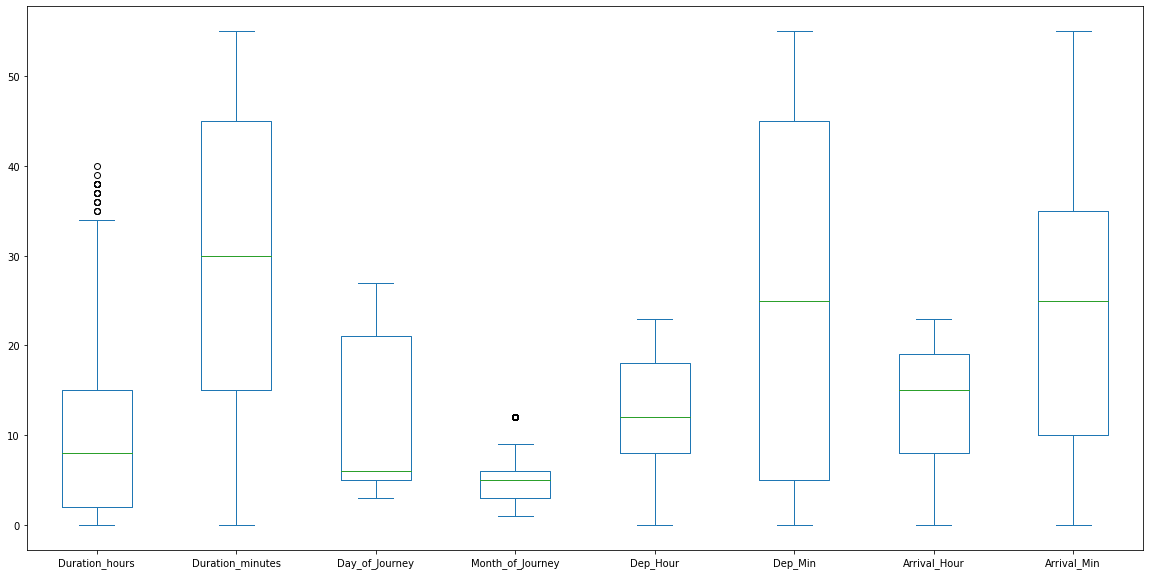

In [173]:
df_test.plot(kind='box',fontsize=10,figsize=(20,10))

Outliers are present in 'Duration' and 'Month_of_journey' columns.

# Removing Outliers:

In [174]:
col=df_test[['Month_of_Journey','Duration_hours']]

In [176]:
from scipy.stats import zscore
z=np.abs(zscore(col))
df_new_test=df_test[(z<3).all(axis=1)]
df_new_test

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration_hours,Duration_minutes,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,10,55,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No Info,4,0,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,23,45,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,13,0,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No Info,2,50,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No Info,23,55,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No Info,2,35,27,3,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,6,35,3,6,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,15,15,3,6,4,0,19,15


In [177]:
df_test.shape

(2671, 14)

In [178]:
df_new_test.shape

(2653, 14)

In [179]:
Loss = (2671-2653)/2671*100
Loss

0.6739049045301385

The loss is around 7% which is acceptable.

# Skewness:

In [180]:
df_new_test.skew()

Duration_hours      0.795392
Duration_minutes   -0.110629
Day_of_Journey      0.475210
Month_of_Journey    0.591565
Dep_Hour            0.083357
Dep_Min             0.132681
Arrival_Hour       -0.432551
Arrival_Min         0.110111
dtype: float64

skewness is observed in 'Duration Hours' and 'Month_of_journey'

# Removing Skewness:

In [182]:
df_new_test["Duration_hours"] = np.log1p(df_new_test["Duration_hours"])
df_new_test["Month_of_Journey"] = np.log1p(df_new_test["Month_of_Journey"])

In [183]:
df_new_test.skew()

Duration_hours     -0.441713
Duration_minutes   -0.110629
Day_of_Journey      0.475210
Month_of_Journey   -0.541053
Dep_Hour            0.083357
Dep_Min             0.132681
Arrival_Hour       -0.432551
Arrival_Min         0.110111
dtype: float64

# Encoding:

In [185]:
cat_cols=[]
for i in df_new_test.dtypes.index:
    if df_new_test.dtypes[i]=='object':
        cat_cols.append(i)
print(cat_cols)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


encoding the categorical columns using encoding.

In [186]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df_new_test[cat_cols]=df_new_test[cat_cols].apply(enc.fit_transform)

# Scaling:

In [188]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
df_new_test=pd.DataFrame(Scaler.fit_transform(df_new_test),columns=df_new_test.columns)
df_new_test

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration_hours,Duration_minutes,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,0.233214,0.031440,-0.167242,0.804966,-0.791072,0.327568,0.468838,1.583185,-0.706193,0.344970,0.766320,0.272445,-1.354818,0.025591
1,-0.348833,0.873978,-1.175634,0.398570,-0.791072,0.327568,-0.449589,-1.697747,-0.823069,1.565339,-1.172433,-0.252462,-0.503215,-0.272182
2,0.233214,0.031440,-0.167242,0.804966,-0.791072,-1.989868,1.187829,0.986652,1.046954,0.041078,1.118821,-0.514916,0.774190,-1.463273
3,0.815260,0.031440,-0.167242,0.804966,-0.791072,0.327568,0.707361,-1.697747,1.046954,0.041078,-0.819933,-1.302277,1.058057,-1.463273
4,-2.094973,-1.653635,0.841150,-1.411740,1.429790,0.327568,-1.207434,1.284918,1.397583,0.344970,1.823822,1.584714,-1.638686,1.216682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2648,-1.512927,0.873978,-1.175634,-0.118662,-0.791072,0.327568,1.187829,1.583185,-0.706193,0.344970,1.295071,0.272445,0.916123,0.025591
2649,-0.348833,0.873978,-1.175634,-0.414222,1.429790,0.327568,-1.207434,0.390119,1.748212,-0.758252,0.237569,-0.252462,0.348388,1.812227
2650,0.233214,0.031440,-0.167242,0.804966,-0.791072,0.327568,-0.027693,0.390119,-1.056822,0.344970,1.471321,1.322260,-1.354818,0.025591
2651,-1.512927,0.031440,-0.167242,0.804966,-0.791072,0.327568,0.832718,-0.802948,-1.056822,0.344970,-1.524934,-1.302277,0.774190,-0.569955


# Predicting:

In [196]:
prdctd_price=Mod.predict(df_new_test)
prdctd_price

array([ 6545.14,  6768.86, 10381.7 , ...,  6210.44,  6813.71,  9677.6 ])

In [200]:
Prediction = pd.DataFrame()
Prediction['Price']= prdctd_price
Prediction

,Price
0,6545.140000
1,6768.860000
2,10381.700000
3,10112.580000
4,7322.898667
...,...
2648,9848.740000
2649,13340.180000
2650,6210.440000
2651,6813.710000
